# Support Vector Classifier

In [100]:
## Load libraries
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import learning_curve
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.svm import LinearSVC

import sys
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
%matplotlib inline

from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import hamming_loss
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score


In [101]:
## retrieve variables
%store -r raw_data
%store -r raw_data_uncorr

In [102]:
## SVC with complete data
## devide train test tentative with stratification to keep the distribution
## raw_data parames [28] / raw_data_uncorr [24]
X = raw_data_uncorr.iloc[:,:24]
Y = raw_data_uncorr.iloc[:,24]

## the dataset is relatively small, so we keep a division: 65% train / 35% test
X_train, X_test, y_train, y_test = train_test_split(X,Y,
                                                   test_size=0.35,
                                                   stratify=Y)        

In [103]:
## scaling train and test dataset with StandardScaler since our distribution are normal more or less
X_train = pd.DataFrame(StandardScaler().fit_transform(X_train))
X_test = pd.DataFrame(StandardScaler().fit_transform(X_test))

SVC is usually a binary classifier, however SVC, LinearSVC and NuSVC can implement the "one-versus-one" approach for multiclass classification. "decision_function_shape" parameter allows to transform the results to "one-vs-rest" (of shape n_samples, n_classes)

In [104]:
## we do not have a linear separable dataset it seems, therefore we try with radial kernel (first attempt with default parameters)
svm_rbf_clf = SVC(kernel = 'rbf', C = 1.0, gamma = 'scale', decision_function_shape = 'ovo')
svm_rbf_score = cross_val_score(svm_rbf_clf, X_train, y_train, cv = 10, n_jobs = -1, verbose = 10)
'Accuracy media: {:0.3f}'.format(np.mean(svm_rbf_score))

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0319s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   3 out of  10 | elapsed:    0.1s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done   5 out of  10 | elapsed:    0.1s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.1s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.1s finished


'Accuracy media: 0.645'

In [105]:
## run the 'poly' kernel with default parameters
svm_poly_clf = SVC(kernel="poly", degree=3, coef0=0.0, C=1, decision_function_shape = 'ovo')
svm_poly_scores = cross_val_score(svm_poly_clf, X_train, y_train, cv=10, n_jobs = -1, verbose = 10)
'Accuracy media: {:0.3f}'.format(np.mean(svm_poly_scores))

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0317s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   3 out of  10 | elapsed:    0.1s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done   5 out of  10 | elapsed:    0.1s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.1s finished


'Accuracy media: 0.565'

In [106]:
## run the 'sigmoid' kernel with default parameters
svm_poly_clf = SVC(kernel="sigmoid", coef0=0.0, C=1, decision_function_shape = 'ovo')
svm_poly_scores = cross_val_score(svm_poly_clf, X_train, y_train, cv=10, n_jobs = -1, verbose = 10)
'Accuracy media: {:0.3f}'.format(np.mean(svm_poly_scores))

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0385s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   3 out of  10 | elapsed:    0.1s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done   5 out of  10 | elapsed:    0.1s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.1s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.1s finished


'Accuracy media: 0.472'

In [107]:
## cross check with linear kernel
svm_lnr_clf = SVC(kernel='linear', C=3.60, verbose = 10, decision_function_shape = 'ovo')
svm_lnr_scores = cross_val_score(svm_lnr_clf, X_train, y_train, cv=10, n_jobs = -1, verbose = 10)
'Accuracy media: {:0.3f}'.format(np.mean(svm_lnr_scores))

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0636s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   3 out of  10 | elapsed:    0.1s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done   5 out of  10 | elapsed:    0.1s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.1s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.2s finished


'Accuracy media: 0.617'

In [108]:
## one vs rest approach
svclnr_clf = LinearSVC()
svclnr_clf_scores = cross_val_score(svclnr_clf, X_train, y_train, cv=10, n_jobs = -1, verbose = 10)
'Accuracy media: {:0.3f}'.format(np.mean(svclnr_clf_scores))

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of  10 | elapsed:    0.3s remaining:    0.6s
[Parallel(n_jobs=-1)]: Done   5 out of  10 | elapsed:    0.3s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done   7 out of  10 | elapsed:    0.3s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.4s finished


'Accuracy media: 0.603'

The mean accuracy of the model run with default parameters flags that the best model might be the SVC with RBF kernel. SVC with linear kernel performed well, so digging a bit more on parameters tuning will help to improve the accuracy of the predictions.

In [83]:
## parameters tuning
param_grid = [
    {'kernel': ['rbf'], 'gamma': [.05, .09, .10], 'C': [0.1, 2.66, 1000]},
    {'kernel': ['linear'], 'C': [0.1, 2.66, 1000]}

]

svm_clf = SVC()

grid_search = GridSearchCV(estimator=svm_clf,
                           param_grid = param_grid,
                           cv = 20,
                           n_jobs = -1
)

grid_search.fit(X_train, y_train)

GridSearchCV(cv=20, estimator=SVC(), n_jobs=-1,
             param_grid=[{'C': [0.1, 2.66, 1000], 'gamma': [0.05, 0.09, 0.1],
                          'kernel': ['rbf']},
                         {'C': [0.1, 2.66, 1000], 'kernel': ['linear']}])

In [84]:
grid_search.best_params_

{'C': 2.66, 'gamma': 0.1, 'kernel': 'rbf'}

In [85]:
print('Best: {}'.format(grid_search.best_score_))
grid_search.best_estimator_

Best: 0.6735795454545455


SVC(C=2.66, gamma=0.1)

In [86]:
results = grid_search.cv_results_

In [87]:
results = pd.DataFrame(results)[['mean_test_score','params']]
results.sort_values(by='mean_test_score',ascending=False)

,mean_test_score,params
5,0.673580,"{'C': 2.66, 'gamma': 0.1, 'kernel': 'rbf'}"
4,0.670549,"{'C': 2.66, 'gamma': 0.09, 'kernel': 'rbf'}"
7,0.666004,"{'C': 1000, 'gamma': 0.09, 'kernel': 'rbf'}"
6,0.664205,"{'C': 1000, 'gamma': 0.05, 'kernel': 'rbf'}"
3,0.663116,"{'C': 2.66, 'gamma': 0.05, 'kernel': 'rbf'}"
8,0.662879,"{'C': 1000, 'gamma': 0.1, 'kernel': 'rbf'}"
9,0.606439,"{'C': 0.1, 'kernel': 'linear'}"
11,0.602983,"{'C': 1000, 'kernel': 'linear'}"
10,0.601420,"{'C': 2.66, 'kernel': 'linear'}"
0,0.444602,"{'C': 0.1, 'gamma': 0.05, 'kernel': 'rbf'}"


In [109]:
## test the dataset with the found parameters: kernel = 'rbf' C = 2.66 and gamma 0.05
svm_rbf_clf = SVC(kernel = 'rbf', C = 2.66, gamma = 0.05)
svm_rbf_score = cross_val_score(svm_rbf_clf, X_train, y_train, cv = 20, n_jobs = -1, verbose = 10)
'Accuracy media tuned: {:0.3f}'.format(np.mean(svm_rbf_score))

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Batch computation too fast (0.0375s.) Setting batch_size=2.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:    0.1s
[Parallel(n_jobs=-1)]: Done   8 out of  20 | elapsed:    0.2s remaining:    0.2s
[Parallel(n_jobs=-1)]: Done  11 out of  20 | elapsed:    0.2s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  14 out of  20 | elapsed:    0.2s remaining:    0.1s
[Parallel(n_jobs=-1)]: Done  17 out of  20 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    0.2s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed:    0.2s finished


'Accuracy media tuned: 0.667'

In [110]:
svm_rbf_clf.fit(X_train, y_train)

SVC(C=2.66, gamma=0.05)

In [111]:
expected = y_test
predicted = svm_rbf_clf.predict(X_test)
rbf_cnf_matrix = confusion_matrix(expected, predicted)
svm_rbf_score_tuned = cross_val_score(svm_rbf_clf, X_test, y_test, cv = 20)
svc = 'Accuracy media tuned: {:0.3f}'.format(np.mean(svm_rbf_score_tuned))
svc

'Accuracy media tuned: 0.577'

In [112]:
## Micro-averaging - In micro-averaging method, you sum up the individual true positives, false positives, 
## and false negatives of the system for different sets and the apply them. And the micro-average F1-Score
## will be simply the harmonic mean of above two equations.

f1_score(expected, predicted, average = 'micro')

0.6542857142857142

In [113]:
## In simplest of terms, Hamming-Loss is the fraction of labels that are incorrectly predicted, 
## i.e., the fraction of the wrong labels to the total number of labels.
hamming_loss(expected, predicted)

0.3457142857142857

In [114]:
svc_accuracy = accuracy_score(expected, predicted)

<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

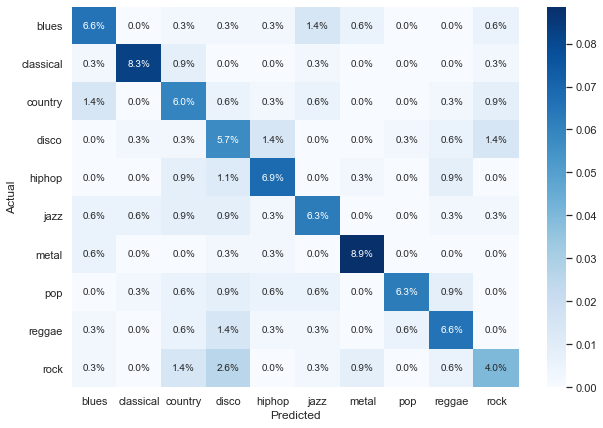

In [115]:
data = rbf_cnf_matrix
df_cm = pd.DataFrame(data, columns=np.unique(y_test), index = np.unique(y_test))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (10,7))
sn.set(font_scale=1.0)#for label size
svc_heatmap = sn.heatmap(df_cm/np.sum(data), cmap="Blues", annot=True, fmt='.1%', annot_kws={"size": 10})# font size
svc_heatmap

In [116]:
%store rbf_cnf_matrix
%store svc_accuracy

Stored 'svc' (str)
Stored 'svc_heatmap' (AxesSubplot)
Stored 'rbf_cnf_matrix' (ndarray)
Stored 'svc_accuracy' (float64)
